In [17]:
import rasterio
from rasterio.plot import show
import geopandas as gpd
import pandas as pd
import os

<Axes: >

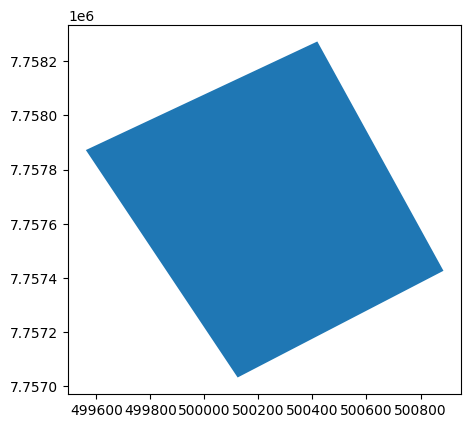

In [15]:
# make shape
from shapely.geometry import Polygon
# VALLE
lat_point_list = [7758274, 7757425, 7757030, 7757872]
lon_point_list = [500418, 500885, 500123, 499561]

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
polygon = gpd.GeoDataFrame(index=[0], crs='epsg:3067', geometry=[polygon_geom])       
polygon.plot()

In [18]:
# save file
outdir = './data/output'
filename = 'valle_outline_big.shp'
outfilepath = os.path.join(outdir, filename)
polygon.to_file(outfilepath, driver="ESRI Shapefile")

In [8]:
raster = rasterio.open("./data/valle/valle_sentinel2_no_clip_4.tif")

In [9]:
raster.shape

(287, 268)

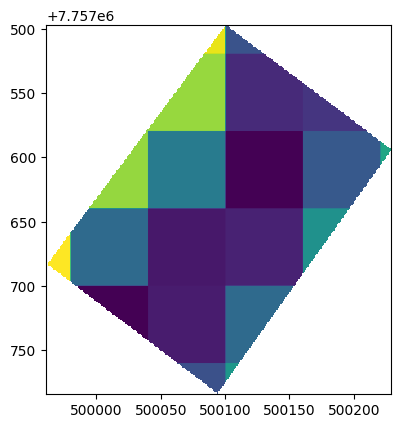

<Axes: >

In [10]:
show(raster)

In [11]:
data = raster.read()

In [12]:
data

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan